# Churn Predictor: Forecasting Customer Churn with Machine Learning

# Business Understanding

## **Problem** 
 Vodafone, a telecommunication company want to find the likelihood of a customer leaving the organization, the key indicators of churn as well as the retention strategies that can be applied to avert this problem.

### Goal
 The purpose of this project is to develop a machine learning model for binary classification. The model will predict whether a given instance belongs to one of two classes based on a set of input features. This includes:
- Develop and train a machine learning model using historical data to predict whether a customer will churn or not.
- Evaluate the model's performance using appropriate metrics : accuracy,precision,recall,f1-score.
- Fine-tune the model parameters with GridSearchCv to optimize performance.
- Perform hypothesis testing to reject or fail to reject the null hypothesis


### Data usage
The data for this projects has been divided into 3. The first 2 data sets are for training and evaluation the machine learning model  while the last data set is for testing the model.

### Null Hypothesis(H0)
 There is no significant relationship between the amount of monthly customer charges and customer churn.

## Alternative hypothesis(H1)
There is a statistically significant relationship between the amount of monthly customer charges and customer churn. 


### Analytical Questions

Pricing Strategy and Customer Retention:
- How do different levels of monthly customer charges impact customer churn rates? Are there specific price points where churn tends to increase significantly? Can we identify an optimal pricing range that minimizes churn while maximizing revenue?


Service Quality and Customer Satisfaction:
- Is there a correlation between higher monthly charges and improved service quality (e.g., better internet speed, enhanced customer support)?
Do customers who pay more tend to stay longer due to better service experiences?
How can we enhance service quality to retain high-paying customers?


Contract Length and Churn Behavior:
- Are customers on longer-term contracts (e.g., annual contracts) less likely to churn compared to those on month-to-month plans?

- How does the relationship between monthly charges and churn differ based on contract duration? Can we encourage customers to opt for longer contracts to reduce churn?

- Does the amount of time spent being a customer equate to the probability of churning by gender?

- Does one's total charges over the year increase as expected or is there a trend of discount for loyal customers?


### Business Sucess Criteria
- Model accuracy: The model's accuracy should be above 70%
- Retention Strategy Effectiveness: The implemented retention strategies should show a measurable impact on reducing customer churn rates. This can be assessed by comparing churn rates before and after implementing the strategies.
- Cost Reduction: The model should contribute to reducing the costs associated with customer acquisition by identifying at-risk customers early on and allowing targeted retention efforts.
- Customer Satisfaction: While focusing on retention, the model and strategies should also aim to maintain or improve customer satisfaction levels. High customer satisfaction leads to increased loyalty and potentially higher customer lifetime value.
- Adaptability and Scalability: The developed model should be adaptable to changing business environments and scalable to accommodate larger datasets or additional features. This ensures its long-term viability and usefulness for the company.
- Feedback and Iteration: Continuous feedback loops should be established to gather insights from the model's predictions and refine the retention strategies accordingly. This iterative process ensures ongoing improvement and optimization of the churn prediction system.

### Future Work
Deploy the model to be used in the company's mobile/web application

### Data Dictionary

| Column Names|Description| Data Type|
|-------------|-----------|----------|
|Gender|Whether the customer is a male or a female|object|
|SeniorCitizen|Whether a customer is a senior citizen or not|int64|
|Partner|Whether the customer has a partner or not (Yes, No)|object|
|Dependents|Whether the customer has dependents or not (Yes, No)|object|
|Tenure|Number of months the customer has stayed with the company|int64|
|Phone Service|Whether the customer has a phone service or not (Yes, No)|object|
|MultipleLines|Whether the customer has multiple lines or not|object|
|InternetService|Customer's internet service provider (DSL, Fiber Optic, No)|object|
|OnlineSecurity|Whether the customer has online security or not (Yes, No, No Internet)|object|
|OnlineBackup|Whether the customer has online backup or not (Yes, No, No Internet)|object|
|DeviceProtection|Whether the customer has device protection or not (Yes, No, No internet service)|object|
|TechSupport|Whether the customer has tech support or not (Yes, No, No internet)|object|
|StreamingTV|Whether the customer has streaming TV or not (Yes, No, No internet service)|object|
|StreamingMovies|Whether the customer has streaming movies or not (Yes, No, No Internet service)|object|
|Contract|The contract term of the customer (Month-to-Month, One year, Two year)|object|
|PaperlessBilling|Whether the customer has paperless billing or not (Yes, No)|object|
|Payment Method|The customer's payment method (Electronic check, mailed check, Bank transfer(automatic), Credit card(automatic))|object|
|MonthlyCharges|The amount charged to the customer monthly|float64|
|TotalCharges|The total amount charged to the customer|float64|
|Churn|Whether the customer churned or not (Yes or No)|object|


## Data Understanding

Importing all necessary libraries needed for the project

In [63]:
#import all necessary libraries

# data manipulation tools
import pandas as pd
import numpy as np
import missingno as msno

# data visualization tools
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# statistics librabry  
from scipy import stats
from scipy.stats import randint,uniform, mannwhitneyu
import statistics as  stat

# database connections
import pyodbc
from dotenv import load_dotenv,dotenv_values

# data preprocessing packages
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder, RobustScaler,FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
import phik
from phik import phik_matrix

# machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier

# metrics packages
from sklearn.metrics import classification_report, confusion_matrix, roc_curve,auc
from sklearn.model_selection import RandomizedSearchCV
# roc curve
# smote for balancing
# feature importance


# hide warnings
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
 

#### Loading Data from various sources

In [7]:
# load environment variables
environment_variables = dotenv_values(".env")

# load database configurations
database = environment_variables.get("DBN")
server = environment_variables.get("DBS")
username = environment_variables.get("DBU")
password = environment_variables.get("DBP")

# database connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"



In [3]:
from sqlalchemy import create_engine

In [4]:
scon = f"mssql+pyodbc://{"DBU"}:{"DBP"}@{"DBS"}/{"DBN"}?driver=SQL+Server"
al_con = create_engine(scon)

In [8]:
# create pyodbc connector
connection = pyodbc.connect(connection_string)

In [9]:
# Loading first dataset from MS SQL server
query = " SELECT * FROM dbo.LP2_Telco_churn_first_3000"
df_1 = pd.read_sql(query, connection)
df_1.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,True,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,False,True,False,False,False,One year,False,Mailed check,56.950001,1889.50,False


In [13]:
# load second dataset
df_2 = pd.read_csv("../Customer_Churn_Analysis/LP2_Telco-churn-second-2000.csv")
df_2.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.5,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.0,1046.5,Yes


In [14]:
# defining a function to check unique values
def unique_val_check(df):
    for col in df.columns:
        if ((df[col].dtype == 'object') or (df[col].dtype == 'bool')) and (col != 'customerID'):
            print(col, '----->', df[col].unique())
            print('=' * 80)

In [15]:
#checking for first dataset
unique_val_check(df_1)

gender -----> ['Female' 'Male']
SeniorCitizen -----> [False  True]
Partner -----> [ True False]
Dependents -----> [False  True]
PhoneService -----> [False  True]
MultipleLines -----> [None False True]
InternetService -----> ['DSL' 'Fiber optic' 'No']
OnlineSecurity -----> [False True None]
OnlineBackup -----> [True False None]
DeviceProtection -----> [False True None]
TechSupport -----> [False True None]
StreamingTV -----> [False True None]
StreamingMovies -----> [False True None]
Contract -----> ['Month-to-month' 'One year' 'Two year']
PaperlessBilling -----> [ True False]
PaymentMethod -----> ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn -----> [False True None]


In [16]:
#checking for second dataset
unique_val_check(df_2)

gender -----> ['Male' 'Female']
Partner -----> ['No' 'Yes']
Dependents -----> ['No' 'Yes']
PhoneService -----> ['Yes' 'No']
MultipleLines -----> ['No' 'No phone service' 'Yes']
InternetService -----> ['DSL' 'Fiber optic' 'No']
OnlineSecurity -----> ['No' 'Yes' 'No internet service']
OnlineBackup -----> ['No' 'Yes' 'No internet service']
DeviceProtection -----> ['No' 'Yes' 'No internet service']
TechSupport -----> ['Yes' 'No' 'No internet service']
StreamingTV -----> ['No' 'Yes' 'No internet service']
StreamingMovies -----> ['No' 'Yes' 'No internet service']
Contract -----> ['Month-to-month' 'Two year' 'One year']
PaperlessBilling -----> ['Yes' 'No']
PaymentMethod -----> ['Credit card (automatic)' 'Electronic check' 'Mailed check'
 'Bank transfer (automatic)']
TotalCharges -----> ['312.7' '1046.5' '2960.1' ... '346.45' '306.6' '6844.5']
Churn -----> ['No' 'Yes']


#### Observations
- From both datasets, most of the unique values correspond. Some values mean the same thing but are given synonymous names or are not present. For this reason, an asumption will be made that they mean the same thing.

- The column names match.

Concatenating Datasets

In [18]:
#concatenate datasets
train_df = pd.concat([df_1,df_2])
train_df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,None,DSL,False,True,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,False,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False


### Data Cleaning

Renaming columns

In [19]:
#define a function to create a common style for column names with lowercase and underscore
def modify_column_names(df):

    rename_columns= {
    "customerID":"customerId",
    "StreamingTV":"StreamingTv"
    }
    df=df.rename(columns=rename_columns) 

    modified_columns = []
    for column in df.columns:
        modified_column = ''
        for char in column:
            if char.isupper():
                modified_column += '_' + char
            else:
                modified_column += char
        modified_columns.append(modified_column.lstrip('_'))
    df.columns = modified_columns

    df= df.rename(columns=lambda x: x.lower()) 
    return df



In [20]:

# applying function to cocatenated dataset
train_df = modify_column_names(train_df)

In [22]:
#checking info of dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        5043 non-null   object 
 1   gender             5043 non-null   object 
 2   senior_citizen     5043 non-null   int64  
 3   partner            5043 non-null   object 
 4   dependents         5043 non-null   object 
 5   tenure             5043 non-null   int64  
 6   phone_service      5043 non-null   object 
 7   multiple_lines     4774 non-null   object 
 8   internet_service   5043 non-null   object 
 9   online_security    4392 non-null   object 
 10  online_backup      4392 non-null   object 
 11  device_protection  4392 non-null   object 
 12  tech_support       4392 non-null   object 
 13  streaming_tv       4392 non-null   object 
 14  streaming_movies   4392 non-null   object 
 15  contract           5043 non-null   object 
 16  paperless_billing  5043 non-n

In [21]:
#checking for duplicates
train_df.duplicated().sum()

0

In [23]:
#checking for which columns have nulls
train_df.isnull().sum()

customer_id            0
gender                 0
senior_citizen         0
partner                0
dependents             0
tenure                 0
phone_service          0
multiple_lines       269
internet_service       0
online_security      651
online_backup        651
device_protection    651
tech_support         651
streaming_tv         651
streaming_movies     651
contract               0
paperless_billing      0
payment_method         0
monthly_charges        0
total_charges          5
churn                  1
dtype: int64

<Axes: >

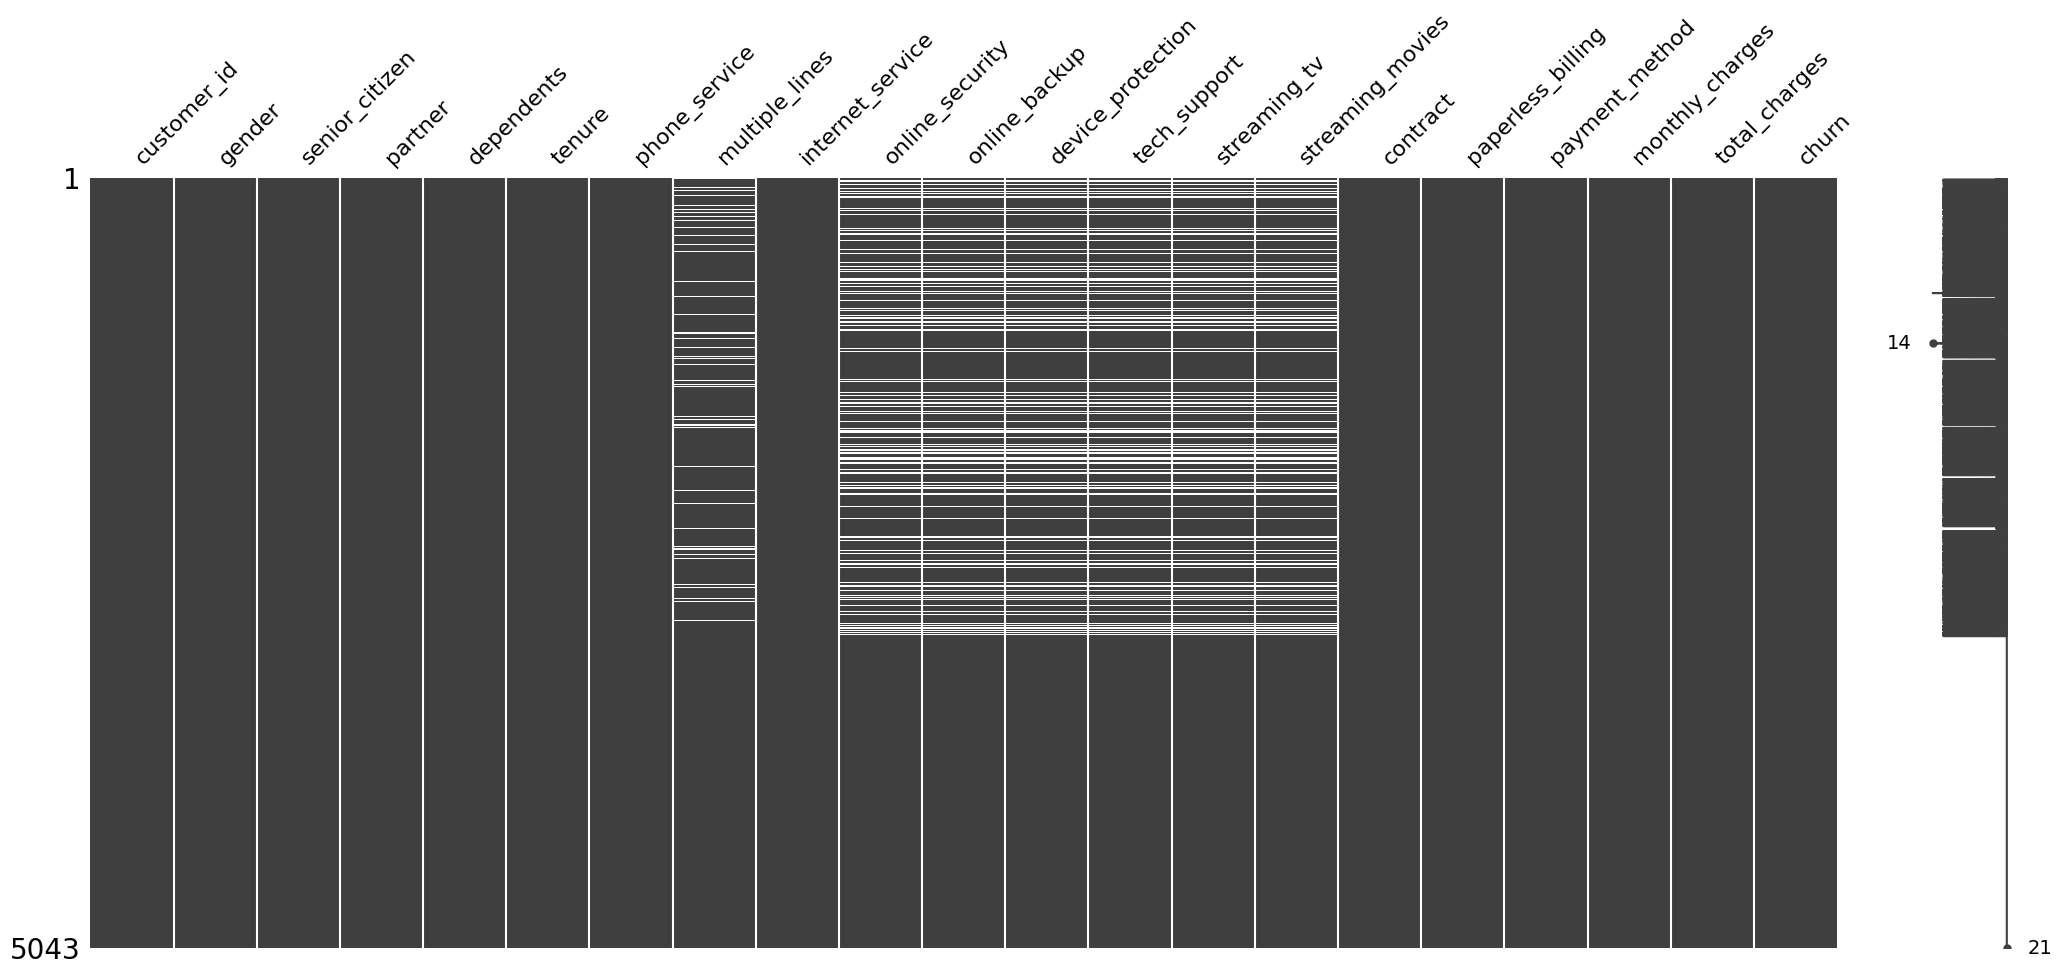

In [27]:
#visualising severity of null values in dataset
msno.matrix(train_df)

Total charges column has a datatype of object. Action to take is to covert to numeric type.

In [28]:
# Convert column to numeric with errors='coerce
train_df['total_charges'] = pd.to_numeric(train_df['total_charges'], errors='coerce')

In [29]:
#confirming changes
train_df.total_charges.dtype

dtype('float64')

As observed earlier, most value names in the categorical columns are synonymous. Action to take is to map each of them to a standard value

In [30]:
# Define a dictionary for mapping boolean and None values to more meaningful categories
new_cat_values_mapping = {
    'multiple_lines': {True: 'Yes', False: 'No', None: 'No phone service'},
    'online_security': {True: 'Yes', False: 'No', None: 'No internet service'},
    'online_backup': {True: 'Yes', False: 'No', None: 'No internet service'},
    'device_protection': {True: 'Yes', False: 'No', None: 'No internet service'},
    'tech_support': {True: 'Yes', False: 'No', None: 'No internet service'},
    'streaming_tv': {True: 'Yes', False: 'No', None: 'No internet service'},
    'streaming_movies': {True: 'Yes', False: 'No', None: 'No internet service'},
    'churn': {True: 'Yes', False: 'No', None: 'No'},
    'partner': {True: 'Yes', False: 'No'},
    'dependents': {True: 'Yes', False: 'No'},
    'paperless_billing': {True: 'Yes', False: 'No'},
    'phone_service': {True: 'Yes', False: 'No'},
}

In [31]:
# Replace old categories with the new ones
train_df.replace(new_cat_values_mapping, inplace=True)

In [32]:
#dropping customer_id column
train_df = train_df.drop(columns=['customer_id'])

## Exploratory Data Analysis

The EDA examines the descriptive statistics summary, univariate and bivariate analysis

In [33]:
#observing descriptive statistics
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
senior_citizen,5043.0,0.162403,0.368857,0.000000,0.000000,0.000000,0.000000,1.000000
tenure,5043.0,32.576641,24.529807,0.000000,9.000000,29.000000,56.000000,72.000000
monthly_charges,5043.0,65.090214,30.068133,18.400000,35.775000,70.550003,90.050003,118.650002
total_charges,5035.0,2302.062861,2269.483576,18.799999,417.675003,1401.150024,3862.000000,8670.100000


The following was observed
***SeniorCitizen*** : The mean value of 0.162 suggests that approximately 16.24% of the customers in the dataset are senior citizens.The standard deviation of 0.369 indicates some variability in the distribution of senior citizen status among customers and the minimum value of 0 implies that there are non-senior customers in the dataset.

***Tenure*** : On average, customers stay with the service provider for approximately 32.58 months.The minimum tenure is 0 months, which could indicate newly acquired customers anf the maximum tenure is 72 months, indicating some customers have been with the provider for a significant period.The standard deviation of 24.53 suggests that there is a considerable variation in tenure lengths among customers.

***MonthlyCharges*** : The minimum monthly charge is $18.40, while the maximum is $118.65 and on average, customers are charged approximately $65.09 per month.The standard deviation of 30.07 indicates variability in monthly charges among customers.

***TotalCharges*** : On average, customers have been charged a total of approximately $2302.06 while The minimum total charge is $18.80, while the maximum is $8670.10. The standard deviation of $2269.48 suggests significant variability in total charges among customers.

### Filling nulls
Filling the total charges column

In [34]:

# Initialize SimpleImputer with strategy='median'
imputer = SimpleImputer(strategy='median')

# Fit the imputer on the 'totalcharges' column
imputer.fit(train_df[['total_charges']])

# Transform and replace missing values in the 'totalcharges' column with the median
train_df['total_charges'] = imputer.transform(train_df[['total_charges']])

# Alternatively, you can use the fit_transform method in one step
# train_df['totalcharges'] = imputer.fit_transform(train_df[['totalcharges']])


In [35]:
#confirm no nulls 
train_df.isnull().sum()

gender               0
senior_citizen       0
partner              0
dependents           0
tenure               0
phone_service        0
multiple_lines       0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
contract             0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
churn                0
dtype: int64

In [36]:
#save training data
train_df.to_csv('Customer_churn_train_data.csv')

### Univariate Analysis

Univariate analysis in this case study includes histograms, density plots, bar plots and count plots of features in the train data.

*Histogram of numeric columns*

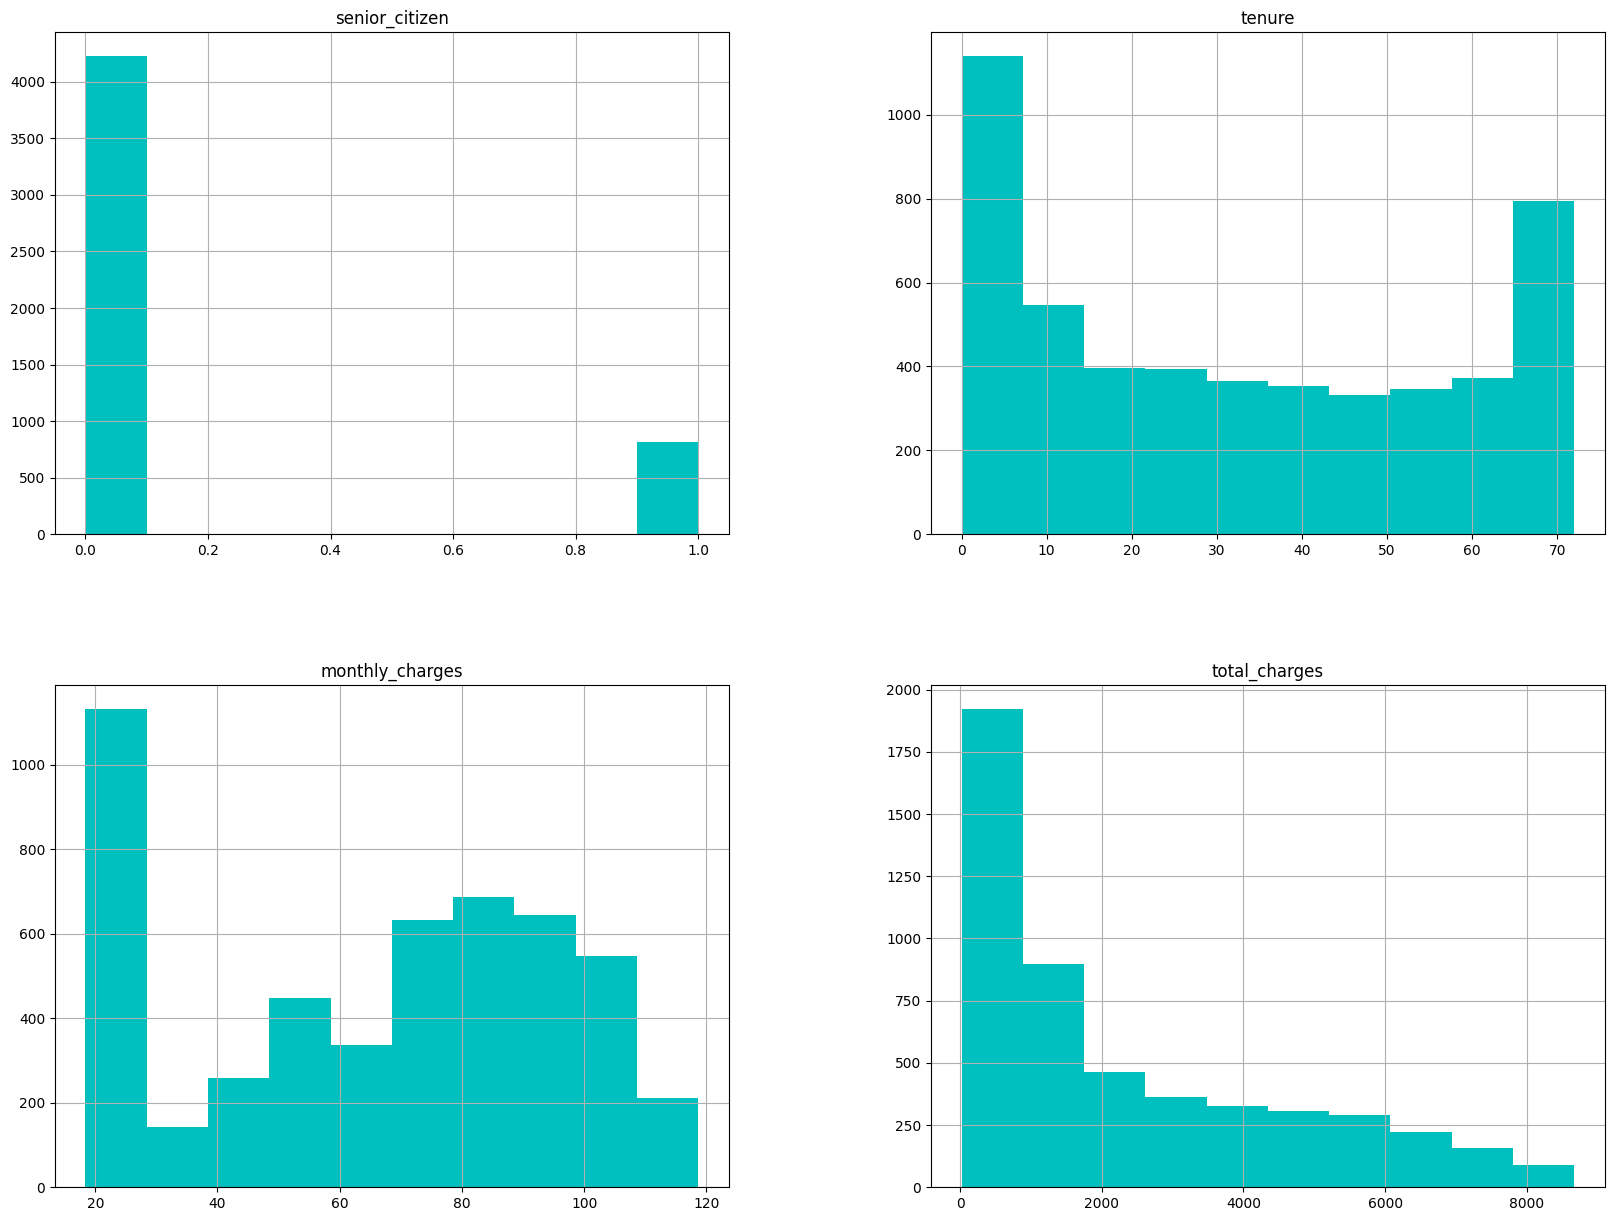

In [37]:
train_df.hist(figsize=(20, 15), color = 'c')
plt.show()

*Density plot*

<Axes: ylabel='Density'>

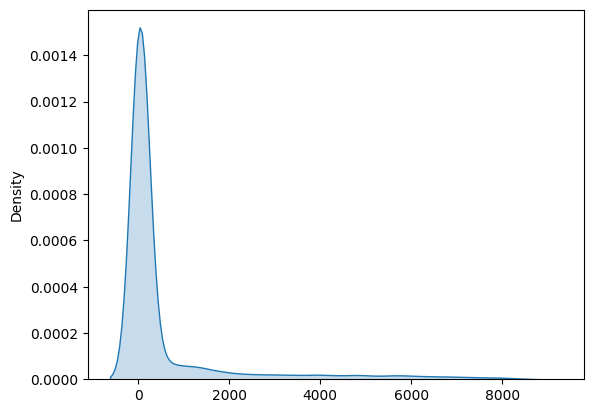

In [39]:
sns.kdeplot(train_df.drop([ 'gender', 'partner', 'dependents', 'phone_service',
       'multiple_lines', 'internet_service', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'contract', 'paperless_billing', 'payment_method',
       'churn'], axis=1).values.ravel(), fill=True)

From the density plot it can concluded the data is positively skewed and does not followthe Gaussian distribution.

In [40]:
#grouping all categorical columns
categoricals = train_df.select_dtypes('object').columns
categoricals

Index(['gender', 'partner', 'dependents', 'phone_service', 'multiple_lines',
       'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'contract', 'paperless_billing', 'payment_method', 'churn'],
      dtype='object')

In [41]:
#dropping categoricals to view numerics
train_df.drop(categoricals, axis=1).skew()

senior_citizen     1.831228
tenure             0.225132
monthly_charges   -0.238767
total_charges      0.946284
dtype: float64

Checking for outliers

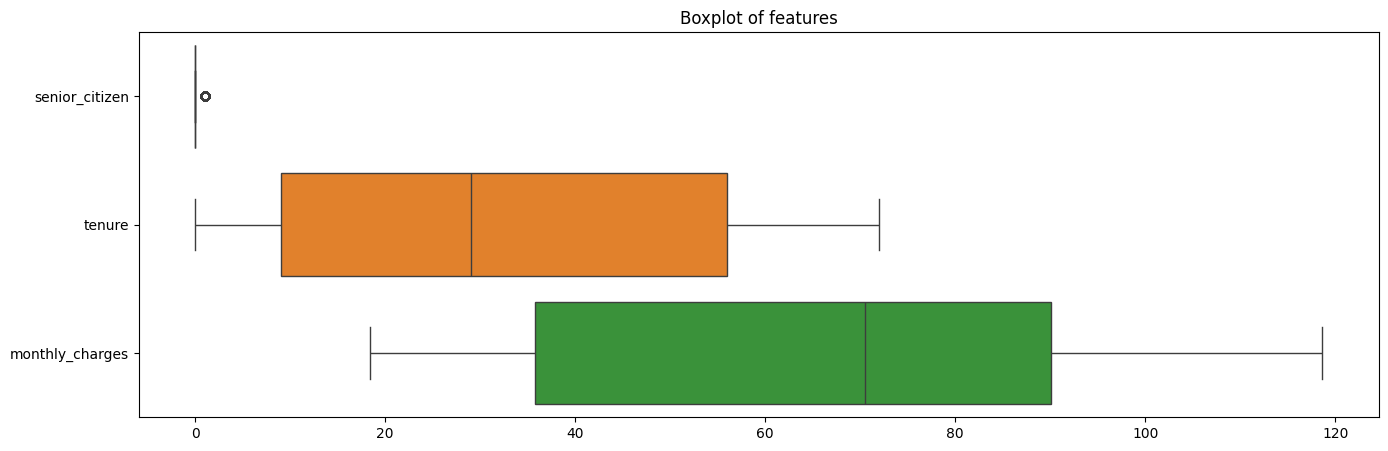

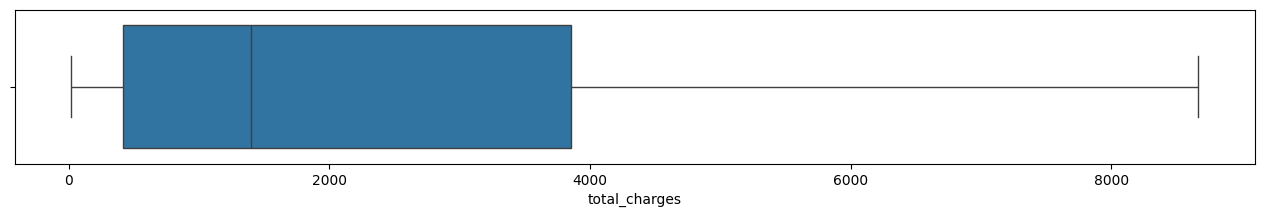

In [42]:
plt.figure(figsize=(16,5))
sns.boxplot(train_df.drop(['total_charges'], axis=1), orient='h')
plt.title('Boxplot of features')


plt.figure(figsize=(16,2))
sns.boxplot(train_df['total_charges'], orient='h')
plt.show()


*Countplots*

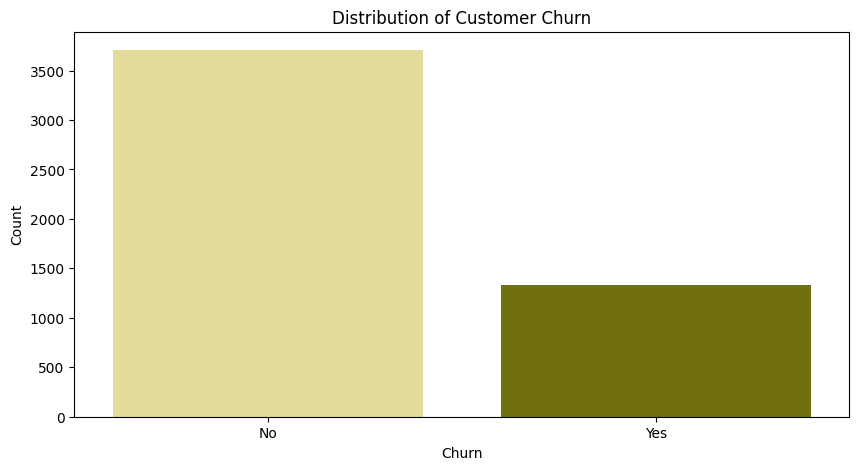

In [44]:
#visualising a countplot of customers churn

plt.figure(figsize =(10,5))
sns.countplot(x='churn', data=train_df, palette={'No': 'khaki', 'Yes': 'olive'})

plt.title("Distribution of Customer Churn")
plt.xlabel('Churn')
plt.ylabel('Count')

# Show the plot
plt.show()


*Pie chart*

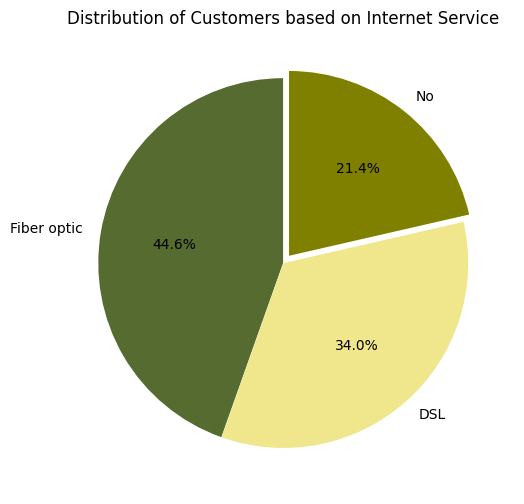

In [47]:
# # Ananlyze the InternetService column
plt.figure(figsize =(10,6))
colors = ['darkolivegreen', 'khaki', 'olive']
plt.pie(x=train_df['internet_service'].value_counts().values,labels=train_df['internet_service'].value_counts().index, autopct='%.1f%%',
        startangle=90, explode=(0.001,0.001,0.05) ,colors=colors)
plt.title('Distribution of Customers based on Internet Service')
plt.show()

### **Key Insights**

- The column 'total_charges' was dropped from the first cell due to the contrasting range from the other numerical values and in turn, dwarfing them. It is checked in a separate cell for outliers.

- Overall, there seem to be no evident outliers in the numerical columns. There is an apparent outlier in the senior citizen simply because there are only two values 0 and 1 and 0 dominates. The data rather has a wide range of values.

- From the density plot results, the columns positively skewed are:
  - 'senior citizen' with a high skewness of 183%
  - 'tenure'  having only 23%
  - 'total charges' of 95%

    whereas the negatively skewed column is:
  - 'monthly charges' of only 24%

- The entire dataset has a positive skewness
- Most customers prefer the DSL or Fibre Optic option.
- A huge number of customers do not churn.

#### Bivariate Analysis

Note: Some of these analysis will be answered in the analytical questions below.

In [48]:
# Relationship between numeric columns
train_df.corr(numeric_only=True).style.background_gradient(cmap='RdBu', vmin=-1, vmax=1)

,senior_citizen,tenure,monthly_charges,total_charges
senior_citizen,1.000000,0.004597,0.221780,0.095463
tenure,0.004597,1.000000,0.240645,0.825839
monthly_charges,0.221780,0.240645,1.000000,0.646828
total_charges,0.095463,0.825839,0.646828,1.000000


The correlation matrix for the numeric features shows a high positive correlation between the following features:
- monthly charges and total charges as if one pays more monthly charges, the more amount which be accountable in total charges and vice versa.
- tenure and total charges which is to be expected because the longer one stays, the cumulative monthly charges increase and in effect, so do the total charges.

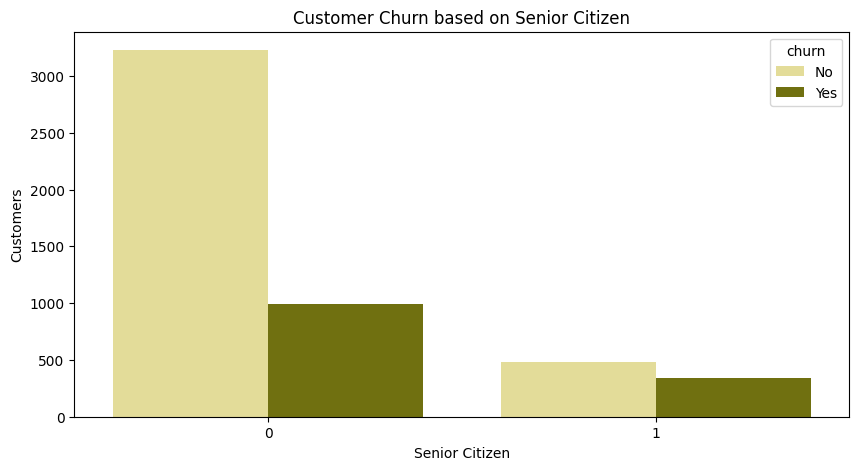

In [49]:
# Relationship between Churn and senior citizens
plt.figure(figsize =(10,5))
sns.countplot(data=train_df, x='senior_citizen',hue='churn', palette={'No': 'khaki', 'Yes': 'olive'})
plt.xlabel('Senior Citizen')
plt.ylabel('Customers')
plt.title('Customer Churn based on Senior Citizen')
plt.show()


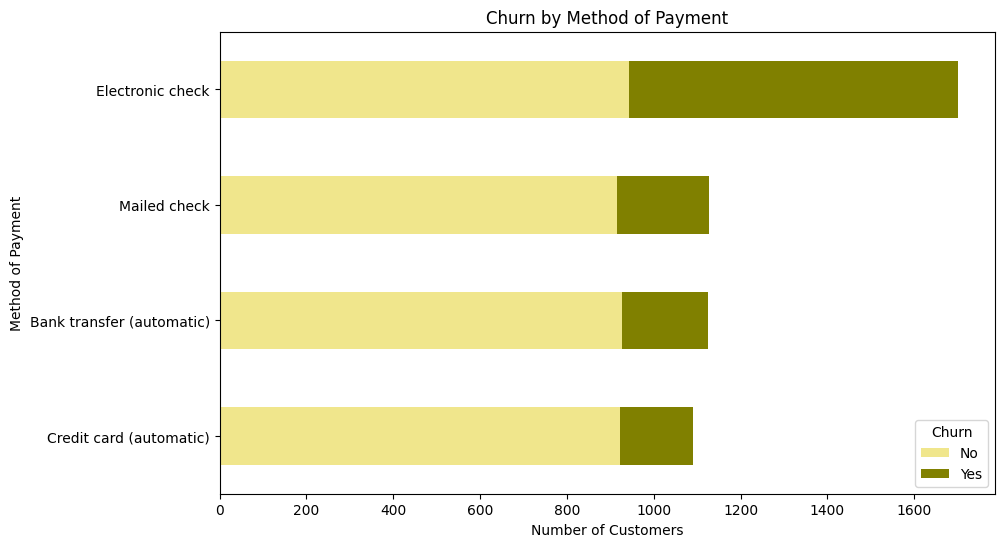

In [51]:
# Count the number of churned and not churned customers for each contract duration
churn_counts = train_df.groupby(['payment_method', 'churn']).size().unstack()

# Calculate the total count of customers for each contract duration category
churn_counts['Total'] = churn_counts.sum(axis=1)

# Sort the DataFrame by the total count of customers in descending order
churn_counts_sorted = churn_counts.sort_values(by='Total', ascending=True)

# Plot a horizontal bar chart with sorted data
churn_counts_sorted.drop(columns='Total').plot(kind='barh', stacked=True, figsize=(10, 6), color={'No': 'khaki', 'Yes': 'olive'})

# Set labels and title
plt.xlabel('Number of Customers')
plt.ylabel('Method of Payment')
plt.title('Churn by Method of Payment')

# Show plot
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

#### **Key Insights**
***Genders*** : male customers are slightly higher than female customrs.

***Partner***: Customers with or without partners are about the same.

***Dependents*** : Seems we have more customers without dependent members than those who have.

***PhoneService*** : Also the majority of customers who don't have a phone service are way more than those who have.

***InternetService*** : Customers who have internet service, prefer mostly DSL or Fiber optic.

***MultipleLines, InternetService, OnlineSecurity, OnlineBackup, TechSupport*** : There is a common pattern in these features indicating that most of the customers prefer not to have access to these features than those who do.

***StreamingMovies and StreamingTV***  have similar barplots, which means there is an equal amount of customers who prefer to either have or not have these services.

***Contract*** : In general customers prefer month-to-month contracts compared to other types such as two year or one year contracts.

***PaperlessBilling*** :  most customers would rather have Paperless billing than any other form and seems they use all the different forms of banking transactions such with Electronic Check being the majority



## Analytical questions

Q1 
- How do different levels of monthly customer charges impact customer churn rates? 


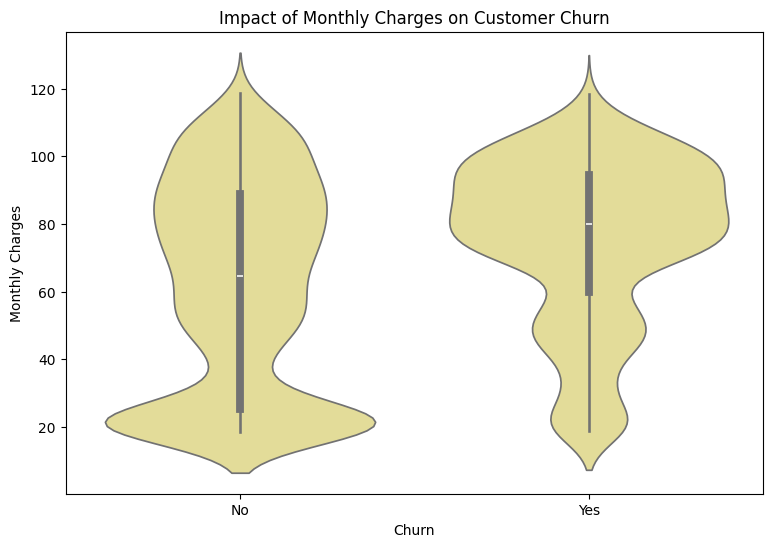

In [53]:
# Relationship beyween Customer Churn and Monthly charges
plt.figure(figsize=(9,6))
sns.violinplot(data=train_df,x='churn',y='monthly_charges', color = 'khaki' )
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.title('Impact of Monthly Charges on Customer Churn')
plt.show()

***Observation*** : 

From the violin plot analysis, it is safe to say that from the yes churn perspective, the bulk of customers who leave pay the monthly charge between the range $80 - $100 whereas from the no churn perspective, the bulk of customers who stay have the density of $20 - $30. 

There is quite an amount of variance in the yes violin plot as compared to the no violin plot

This translates further to say these customers leaving are probably due to the high monthly charges. In the No violin plot, there are also customers in the same range of substantial density that also stay and this could be due to other services they get included which will have to be investigated further down the analysis.

Are there specific price points where churn tends to increase significantly? Can we identify an optimal pricing range that minimizes churn while maximizing revenue?

Q2

Is there a correlation between higher monthly charges and improved service quality (e.g., better internet speed, enhanced customer support)?


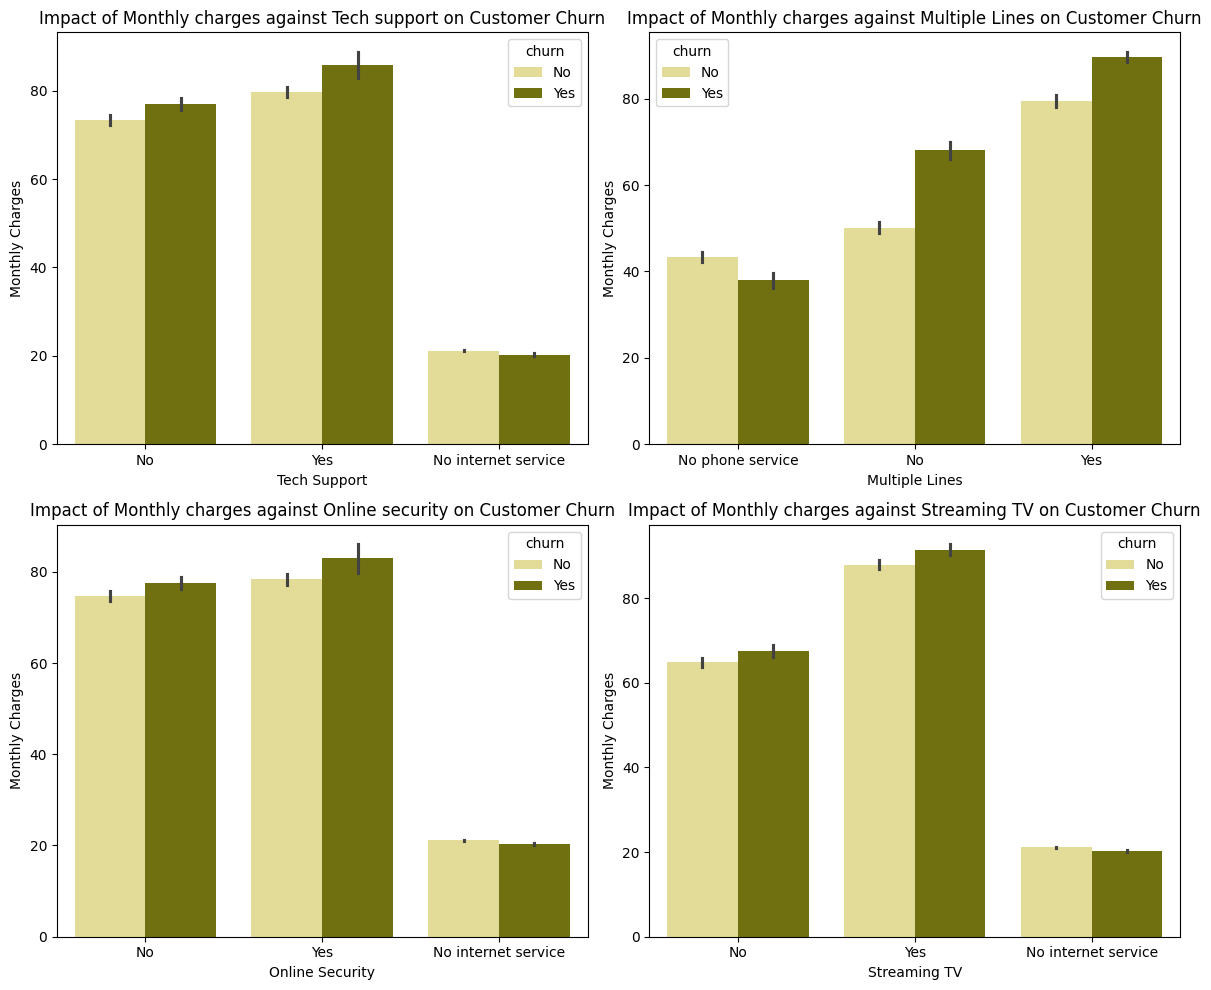

In [54]:


# Create a 2x2 grid for subplots
plt.figure(figsize=(12, 10))


# Plot the first visualization in the first subplot
plt.subplot(2, 2, 1)
sns.barplot(data=train_df, x='tech_support', y='monthly_charges', hue='churn',  palette={'No': 'khaki', 'Yes': 'olive'})
plt.xlabel('Tech Support')
plt.ylabel('Monthly Charges')
plt.title('Impact of Monthly charges against Tech support on Customer Churn')

# Plot the second visualization in the second subplot
plt.subplot(2, 2, 2)
sns.barplot(data=train_df, x='multiple_lines', y='monthly_charges', hue='churn', palette={'No': 'khaki', 'Yes': 'olive'})
plt.xlabel('Multiple Lines')
plt.ylabel('Monthly Charges')
plt.title('Impact of Monthly charges against Multiple Lines on Customer Churn')

# Plot the third visualization in the third subplot
plt.subplot(2, 2, 3)
sns.barplot(data=train_df, x="online_security", y="monthly_charges", hue="churn",  palette={'No': 'khaki', 'Yes': 'olive'})
plt.xlabel('Online Security')
plt.ylabel('Monthly Charges')
plt.title('Impact of Monthly charges against Online security on Customer Churn')

# Plot the fourth visualization in the third subplot
plt.subplot(2, 2, 4)
sns.barplot(data=train_df, x="streaming_tv", y="monthly_charges", hue="churn",  palette={'No': 'khaki', 'Yes': 'olive'})
plt.xlabel('Streaming TV')
plt.ylabel('Monthly Charges')
plt.title('Impact of Monthly charges against Streaming TV on Customer Churn')


# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


***Observation*** :

It seems for all services, the customers with no internet services are the safest when it involves a link between monthly charges and services provided.
For those who do have an internet service, regardless of whether one uses the service or not, the probability of having high charges is present. Therefore the likelihood of churning is a gamble .

Q3



Are customers on longer-term contracts (e.g., annual contracts) less likely to churn compared to those on month-to-month plans?



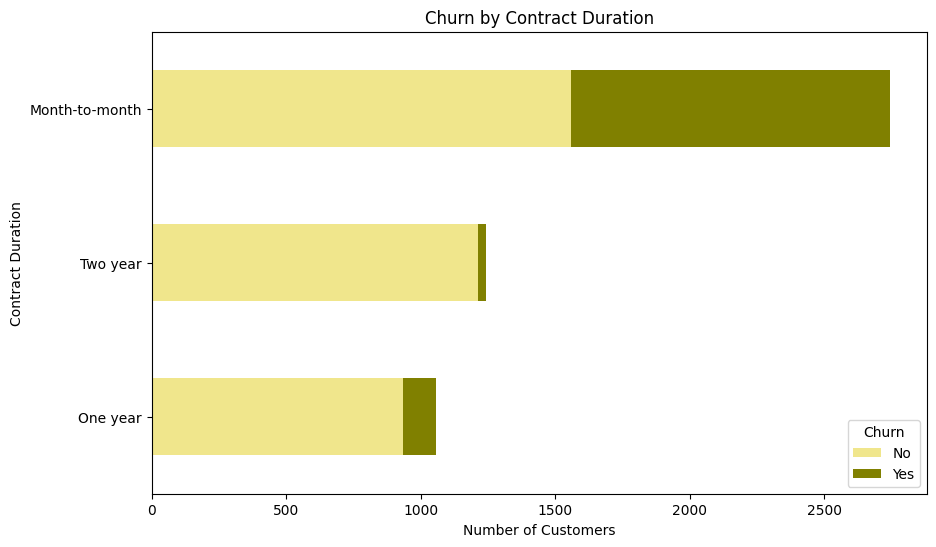

In [56]:
# Count the number of churned and not churned customers for each contract duration
churn_counts = train_df.groupby(['contract', 'churn']).size().unstack()

# Calculate the total count of customers for each contract duration category
churn_counts['Total'] = churn_counts.sum(axis=1)

# Sort the DataFrame by the total count of customers in descending order
churn_counts_sorted = churn_counts.sort_values(by='Total', ascending=True)

# Plot a horizontal bar chart with sorted data
churn_counts_sorted.drop(columns='Total').plot(kind='barh', stacked=True, figsize=(10, 6), color={'No': 'khaki', 'Yes': 'olive'})

# Set labels and title
plt.xlabel('Number of Customers')
plt.ylabel('Contract Duration')
plt.title('Churn by Contract Duration')

# Show plot
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

***Observation*** : In general a lot of customers are on month-to-month contracts compared to other types such as two year or one year contracts. They are also the customers with a high risk of churning.

Q4

How does the relationship between monthly charges and churn differ based on contract duration? Can we encourage customers to opt for longer contracts to reduce churn?

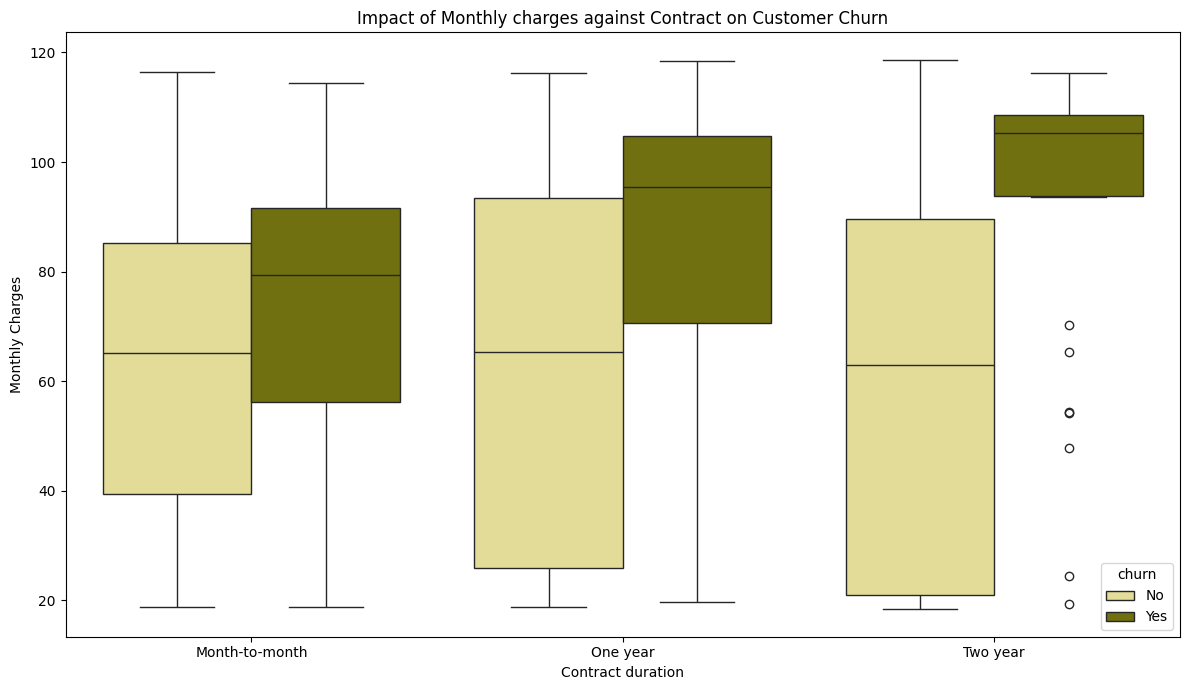

In [65]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=train_df, x='contract',y='monthly_charges', hue='churn',  palette={'No': 'khaki', 'Yes': 'olive'})
plt.xlabel('Contract duration')
plt.ylabel('Monthly Charges')
plt.title('Impact of Monthly charges against Contract on Customer Churn')
plt.tight_layout()
plt.show()

***Observation***:

In terms of contract duration, for month-to-month contracts, the bulk of charges range from $40-$90. 
- Customers who fall in the range of approximately $60 - $90 have a high chance of churning.

Customers who opt for one or two years typcaly have charges ranging from as low as $20 to $110 per month. 
- Customers having a contact of one year who fall in the range of $70 - approximately $100 have a high chance of churning.
- Customers having a contact of two years who fall in the range of $100 - approximately $110 have a high chance of churning although the outliers in the chart suggest some ccustomers churning even at low monthly charges.

Q5

Does the amount of time spent being a customer have a relationship with the probability of churning by gender?

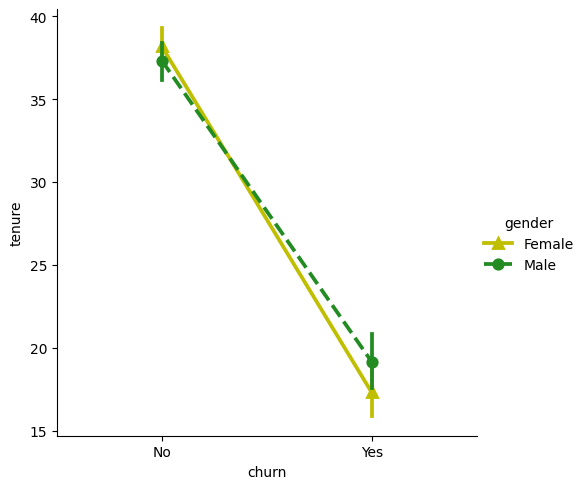

In [59]:
sns.catplot(
    data=train_df, x="churn", y="tenure", hue="gender",
    palette={"Male": "forestgreen", "Female": "y"},
    markers=["^", "o"], linestyles=["-", "--"],
    kind="point"
)
plt.show()

***Observation***:

The chart suggest that for both genders, the probability of churning reduces over time.

Q6

Does one's total charges over the year increase as expected or is there a trend of discount for loyal customers?

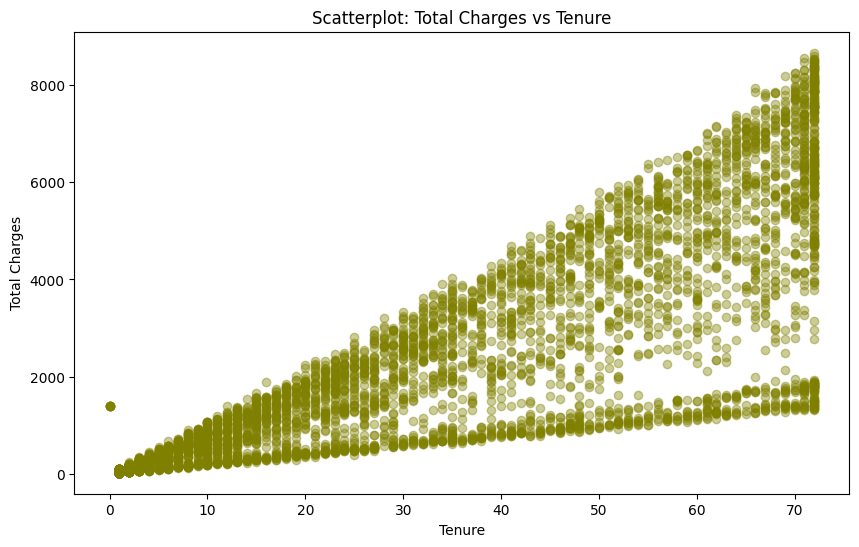

In [66]:
# Plotting the scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(train_df['tenure'], train_df['total_charges'], alpha=0.4, color='olive')

# Adding labels and title
plt.xlabel('Tenure')
plt.ylabel('Total Charges')
plt.title('Scatterplot: Total Charges vs Tenure')

# Show plot
#plt.grid(True)
plt.show()


***Observation***:

The graph shows that is there is an expected increase of total charges over the year for customers in Vodafone. There is no indication of discount for loyal customers



#### **Key Insights**
***Genders*** : male customers are slightly higher than female customrs.

***Partner***: Customers with or without partners are about the same.

***Dependents*** : Seems we have more customers without dependent members than those who have.

***PhoneService*** : Also the majority of customers who don't have a phone service are way more than those who have.

***InternetService*** : Customers who have internet service, prefer mostly DSL or Fiber optic.

***MultipleLines, InternetService, OnlineSecurity, OnlineBackup, TechSupport*** : There is a common pattern in these features indicating that most of the customers prefer not to have access to these features than those who do.

***StreamingMovies and StreamingTV***  have similar barplots, which means there is an equal amount of customers who prefer to either have or not have these services.



***PaperlessBilling*** :  most customers would rather have Paperless billing than any other form and seems they use all the different forms of banking transactions such with Electronic Check being the majority

Do customers who pay more tend to stay longer due to better service experiences?
How can we enhance service quality to retain high-paying customers?



### Hypothesis testing


**Null Hypothesis(H0)**: There is no significant relationship between the amount of monthly customer charges and customer churn.

**Alternative hypothesis(H1)**: There is a statistically significant relationship between the amount of monthly customer charges and customer churn. 

#### Since the distribution is not normal from the viusalisations, the test method used was Wilcoxon rank-sum test

In [64]:
# Split the data into two groups based on churn status
churned_yes = train_df[train_df['churn'] == 'Yes']['monthly_charges']
churned_no = train_df[train_df['churn'] == 'No']['monthly_charges']

# Perform the Mann-Whitney U test
statistic, p_value = mannwhitneyu(churned_yes, churned_no, alternative='two-sided')

# Print the results
print(f"Mann-Whitney U statistic: {statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value > alpha:
    print("Fail to reject the null hypothesis: There is no significant relationship between the amount of monthly customer charges and customer churn.")
else:
    print("Reject the null hypothesis: There is a significant relationship between the amount of monthly customer charges and customer churn.")


Mann-Whitney U statistic: 3100791.0
P-value: 1.2019873209608733e-42
Reject the null hypothesis: There is a significant relationship between the amount of monthly customer charges and customer churn.


The results show that the amount of monthly custmer charges is statisically significant to the churn prediction.

## Data Preparation

In [68]:
# Compute the Phi-K correlation matrix
phik_matrix = train_df.phik_matrix()

# Print the Phi-K correlation matrix
print("Phi-K Correlation Matrix:")
print(phik_matrix)

interval columns not set, guessing: ['senior_citizen', 'tenure', 'monthly_charges', 'total_charges']
Phi-K Correlation Matrix:
                     gender  senior_citizen   partner  dependents    tenure  \
gender             1.000000        0.000000  0.000000    0.013919  0.020282   
senior_citizen     0.000000        1.000000  0.032588    0.332656  0.028254   
partner            0.000000        0.032588  1.000000    0.660713  0.471292   
dependents         0.013919        0.332656  0.660713    1.000000  0.224955   
tenure             0.020282        0.028254  0.471292    0.224955  1.000000   
phone_service      0.000000        0.000000  0.000000    0.000000  0.000000   
multiple_lines     0.000000        0.079744  0.084249    0.009377  0.377305   
internet_service   0.002392        0.162048  0.000000    0.107357  0.017208   
online_security    0.003063        0.128196  0.086853    0.116573  0.362191   
online_backup      0.000000        0.109796  0.088165    0.094783  0.400946   
devi

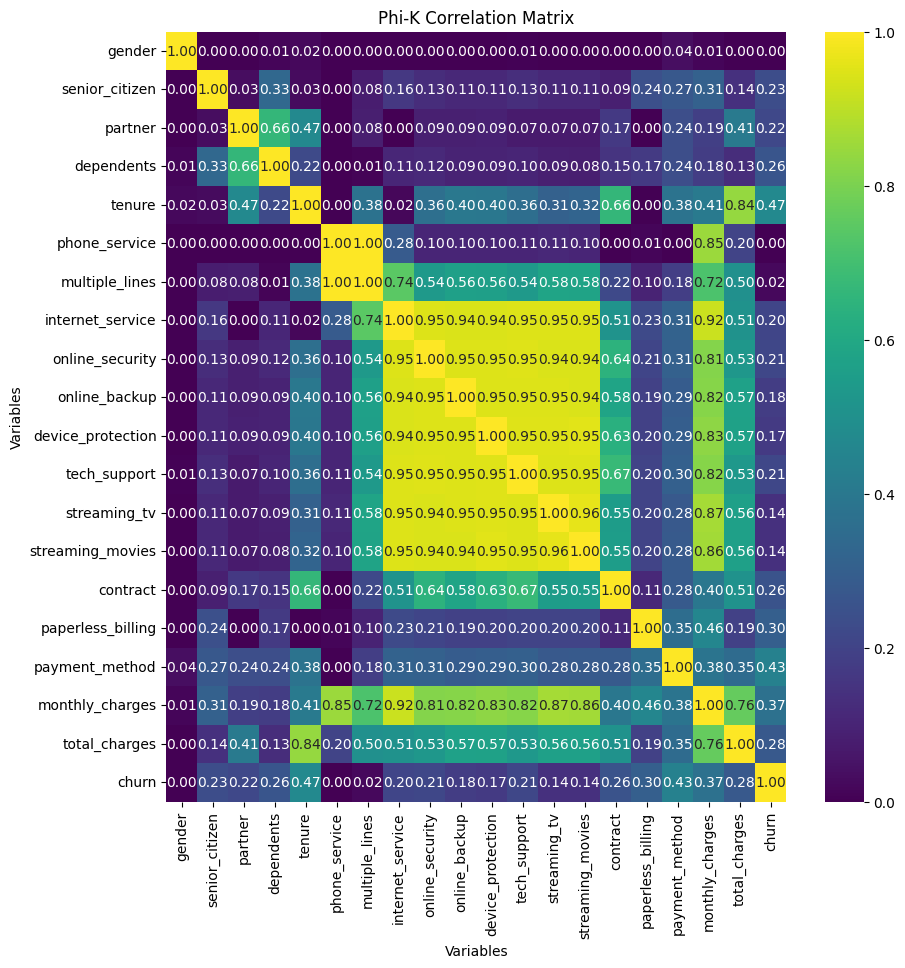

In [70]:
# Plot the heatmap of the Phi-K correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(phik_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Phi-K Correlation Matrix')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.show()

***Key Insights***

From the Phi-K matrix, the features most important for data modelling are:

- Tenure

- Payment method

- Monthly charges

- Paperless billing

- Dependents

- Contracts

- Total Charges



The features were then further investigated for multicollinearity. The following were flagged:

- Tenure and total charges with a correlation coefficient of 0.84
- Total charges and monthly charges with a correlation coefficient of 0.76

It was very interesting to observe that monthly charges were highly correlated with "luxury" services.


##### Action to take

- Exclude totalcharges from the data modeling
- Drop the other columns not identified significant for modeling

## Checking for data balance

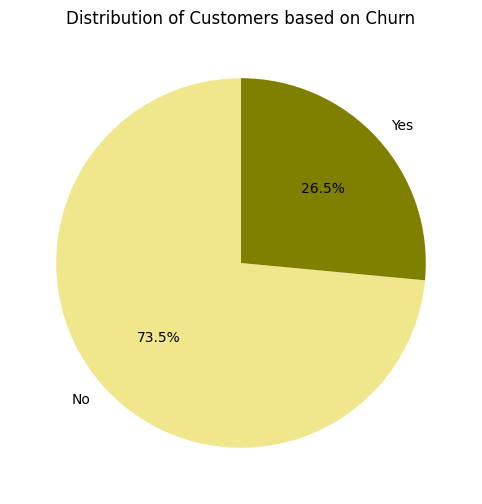

In [73]:
#checking if the churn column is unbalanced
plt.figure(figsize =(10,6))
colors = [ 'khaki', 'olive']
plt.pie(x=train_df['churn'].value_counts().values,labels=train_df['churn'].value_counts().index, autopct='%.1f%%',
        startangle=90,colors=colors)
plt.title('Distribution of Customers based on Churn')
plt.show()

In [74]:
# Ananlyze the Churn column

train_df["churn"].value_counts()

churn
No     3707
Yes    1336
Name: count, dtype: int64

***Observation***:
The data is moderately imbalanced

#### Selecting relevant features for modelling

In [81]:
# Relevant Feature Variables
X = train_df[["tenure","payment_method", "monthly_charges", "contract","paperless_billing","dependents"]]

# target variable
y = train_df["churn"]

In [82]:
X.head()

,tenure,payment_method,monthly_charges,contract,paperless_billing,dependents
0,1,Electronic check,29.850000,Month-to-month,Yes,No
1,34,Mailed check,56.950001,One year,No,No
2,2,Mailed check,53.849998,Month-to-month,Yes,No
3,45,Bank transfer (automatic),42.299999,One year,No,No
4,2,Electronic check,70.699997,Month-to-month,Yes,No


#### Splitting data for training and testing

In [83]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [84]:
encoder = LabelEncoder()

y_train_encoded = encoder.fit_transform(y_train)
y_val_encoded = encoder.transform(y_val)

### Preparing Pipelines

In [85]:
#grouping all categorical columns
categoricals = X.select_dtypes("object").columns
categoricals

Index(['payment_method', 'contract', 'paperless_billing', 'dependents'], dtype='object')

In [86]:
#grouping all numeric columns
numerics = X.select_dtypes("number").columns
numerics

Index(['tenure', 'monthly_charges'], dtype='object')

In [87]:
# create function to handle preprocessing of data for training pipeline to handle numerical values 

def preprocessor_function(X_train,X_val):
    numerical_pipeline = Pipeline(steps=[
        ('num_imputer',SimpleImputer(strategy="median")),
        ('num_scaler',RobustScaler()),
        ('log_transformer',FunctionTransformer(np.log1p))
        ])

    # create pipeline to handle categorical values
    categorical_pipeline = Pipeline(steps=[
        ('cat_imputer', SimpleImputer(strategy="most_frequent")),
        ('cat_encoder',OneHotEncoder())
        
    ])

    preprocessor = ColumnTransformer(transformers=[
        ('num_pipeline',numerical_pipeline,numerics),
        ('cat_pipeline',categorical_pipeline,categoricals)
    ])
    # fit and transform preprocessor on train data 
    X_train_preprocessed = pd.DataFrame(preprocessor.fit_transform(X_train))

    # transform validation data using the fitted preprocessor
    X_val_preprocessed = pd.DataFrame(preprocessor.transform(X_val))
    return X_train_preprocessed,X_val_preprocessed

In [88]:
# calling the preprocessor function on the X_train and X_val datasets
X_train_preprocessed,X_val_preprocessed = preprocessor_function(X_train,X_val)

### Modeling


The modeling process consists of two phases:
- training with imbalanced data
- training after balancing data



Models

In [89]:
#list of models to train
models = [
    ('log_regression',LogisticRegression(random_state=42)),
    ('decision_tree',DecisionTreeClassifier(random_state=42)),
    ('knn',KNeighborsClassifier(n_neighbors=5)),
    ('random_forest',RandomForestClassifier(random_state=42)),
    ('sgb_classiffier',GradientBoostingClassifier(random_state=42)),
    ('catboost',CatBoostClassifier(random_state=42))
    ]

### Training Models with Unbalanced data

In [90]:
# definign a function to train and evaluate models
all_pipelines = {}

def modeling_function(models, X_train_preprocessed, y_train_encoded, X_val_preprocessed, y_val_encoded):
    # create a DataFrame for storing metrics in table
    metrics_table = pd.DataFrame(columns=['model_name', 'accuracy', 'precision', 'recall', 'f1_score', 'conf_matrix'])

    # loop through the models
    for model_name, classifier in models:
        # build final pipeline with preprocessor estimator
        final_pipeline = Pipeline(steps=[
            ('estimator', classifier)
        ])

        # fit training data to final pipeline
        final_pipeline.fit(X_train_preprocessed, y_train_encoded)

        # add models to all_pipeline dictionary
        all_pipelines[model_name] = final_pipeline

        # make prediction
        y_predict = final_pipeline.predict(X_val_preprocessed)

        # Generate Classification report for each pipeline or model
        metrics = classification_report(y_val_encoded, y_predict, output_dict=True)
        
        # Compute confusion matrix
        conf_matrix = confusion_matrix(y_val_encoded, y_predict)

        # Grab all important metrics
        accuracy = metrics['accuracy']
        precision = metrics['weighted avg']['precision']
        recall = metrics['weighted avg']['recall']
        f1_score = metrics['weighted avg']['f1-score']

        # add important metrics to metrics_table
        metrics_table.loc[len(metrics_table)] = [model_name, accuracy, precision, recall, f1_score, conf_matrix]

    # display metrics_table
    return metrics_table

In [91]:
# calling the modeling function
metrics_table = modeling_function(models, X_train_preprocessed, y_train_encoded, X_val_preprocessed, y_val_encoded)


Learning rate set to 0.018689
0:	learn: 0.6802840	total: 148ms	remaining: 2m 28s
1:	learn: 0.6677176	total: 152ms	remaining: 1m 15s
2:	learn: 0.6557703	total: 154ms	remaining: 51.3s
3:	learn: 0.6445522	total: 157ms	remaining: 39.1s
4:	learn: 0.6348197	total: 160ms	remaining: 31.8s
5:	learn: 0.6241801	total: 163ms	remaining: 26.9s
6:	learn: 0.6145834	total: 165ms	remaining: 23.5s
7:	learn: 0.6055128	total: 169ms	remaining: 20.9s
8:	learn: 0.5967979	total: 172ms	remaining: 19s
9:	learn: 0.5887901	total: 177ms	remaining: 17.5s
10:	learn: 0.5806726	total: 179ms	remaining: 16.1s
11:	learn: 0.5730657	total: 183ms	remaining: 15.1s
12:	learn: 0.5658216	total: 186ms	remaining: 14.1s
13:	learn: 0.5591920	total: 189ms	remaining: 13.3s
14:	learn: 0.5530600	total: 191ms	remaining: 12.6s
15:	learn: 0.5461979	total: 193ms	remaining: 11.9s
16:	learn: 0.5412684	total: 196ms	remaining: 11.3s
17:	learn: 0.5355583	total: 200ms	remaining: 10.9s
18:	learn: 0.5305160	total: 203ms	remaining: 10.5s
19:	learn: 

In [92]:
#display metrics results
metrics_table.sort_values(by="f1_score", ascending=False)

,model_name,accuracy,precision,recall,f1_score,conf_matrix
0,log_regression,0.797820,0.792946,0.797820,0.794953,"[[651, 91], [113, 154]]"
4,sgb_classiffier,0.787909,0.780277,0.787909,0.783073,"[[652, 90], [124, 143]]"
5,catboost,0.779980,0.772789,0.779980,0.775612,"[[646, 96], [126, 141]]"
2,knn,0.766105,0.758306,0.766105,0.761461,"[[639, 103], [133, 134]]"
3,random_forest,0.760159,0.753619,0.760159,0.756424,"[[633, 109], [133, 134]]"
1,decision_tree,0.712587,0.725362,0.712587,0.718090,"[[579, 163], [127, 140]]"


From the table above, the top 3 performing models based on the f1_score are the logistic regression, sgb_classifier and catboost which will further be tuned for a better performance


### Visualising Models woth Confusion Matrix

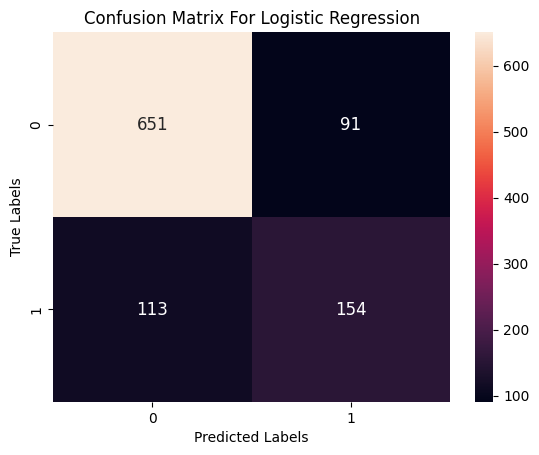

In [93]:
# Get the best performing model
best_model = metrics_table.sort_values(by="f1_score", ascending=False).iloc[0]

# Extract confusion matrix from the best model
conf_matrix = best_model['conf_matrix']

# Plot the confusion matrix using heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', annot_kws={"size": 12})

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix For Logistic Regression')

# Display the plot
plt.show()

### Training Dataset On Balanced Data

#### Upscaling Unbalanced Data Using Synthetic Minority Over-sampling Technique (SMOTE)

In [94]:
# Instantiate SMOTE library
smote = SMOTE(random_state=42, k_neighbors=5)

# Define SMOTE Pipeline
smote_pipeline = ImbPipeline(steps=[
    ('smote', smote)
])

# Apply the pipeline to X_train and y_train
X_resampled, y_resampled = smote_pipeline.fit_resample(X_train_preprocessed, y_train)

# Count of Labels Before sampling
unique_before, counts_before = np.unique(y_train,return_counts=True)
print("Before SMOTE sampling:")
print(dict(zip(unique_before, counts_before)))

# After sampling
unique_after, counts_after = np.unique(y_resampled, return_counts=True)
print("\nAfter SMOTE sampling:")
print(dict(zip(unique_after, counts_after)))


Before SMOTE sampling:
{'No': 2965, 'Yes': 1069}

After SMOTE sampling:
{'No': 2965, 'Yes': 2965}


### Encoding the y-sampled

In [95]:
y_resampled_encoded = encoder.fit_transform(y_resampled)

### Training models with balanced data

In [96]:
# calling the modling function on the balanced
modeling_function(models,X_resampled,y_resampled_encoded,X_val_preprocessed,y_val_encoded)

Learning rate set to 0.022031
0:	learn: 0.6814145	total: 3.37ms	remaining: 3.37s
1:	learn: 0.6716539	total: 6.42ms	remaining: 3.2s
2:	learn: 0.6618301	total: 9.1ms	remaining: 3.02s
3:	learn: 0.6518985	total: 12.7ms	remaining: 3.16s
4:	learn: 0.6423772	total: 15.6ms	remaining: 3.11s
5:	learn: 0.6352621	total: 18.3ms	remaining: 3.04s
6:	learn: 0.6266985	total: 21.2ms	remaining: 3s
7:	learn: 0.6193503	total: 24ms	remaining: 2.98s
8:	learn: 0.6116683	total: 27.5ms	remaining: 3.02s
9:	learn: 0.6040882	total: 30.3ms	remaining: 3s
10:	learn: 0.5975478	total: 33.2ms	remaining: 2.99s
11:	learn: 0.5917233	total: 35.9ms	remaining: 2.95s
12:	learn: 0.5855908	total: 38.5ms	remaining: 2.92s
13:	learn: 0.5800668	total: 41.5ms	remaining: 2.92s
14:	learn: 0.5744111	total: 45.2ms	remaining: 2.97s
15:	learn: 0.5695539	total: 48ms	remaining: 2.95s
16:	learn: 0.5646355	total: 50.5ms	remaining: 2.92s
17:	learn: 0.5604414	total: 53.4ms	remaining: 2.91s
18:	learn: 0.5580157	total: 55ms	remaining: 2.84s
19:	le

,model_name,accuracy,precision,recall,f1_score,conf_matrix
0,log_regression,0.725471,0.797478,0.725471,0.740945,"[[517, 225], [52, 215]]"
1,decision_tree,0.715560,0.737599,0.715560,0.724044,"[[568, 174], [113, 154]]"
2,knn,0.727453,0.771982,0.727453,0.740281,"[[546, 196], [79, 188]]"
3,random_forest,0.738355,0.758175,0.738355,0.745851,"[[581, 161], [103, 164]]"
4,sgb_classiffier,0.746283,0.801388,0.746283,0.759508,"[[543, 199], [57, 210]]"
5,catboost,0.757185,0.792999,0.757185,0.767629,"[[569, 173], [72, 195]]"


In [97]:
# 
metrics_table.sort_values(by='accuracy',ascending=False)

,model_name,accuracy,precision,recall,f1_score,conf_matrix
0,log_regression,0.797820,0.792946,0.797820,0.794953,"[[651, 91], [113, 154]]"
4,sgb_classiffier,0.787909,0.780277,0.787909,0.783073,"[[652, 90], [124, 143]]"
5,catboost,0.779980,0.772789,0.779980,0.775612,"[[646, 96], [126, 141]]"
2,knn,0.766105,0.758306,0.766105,0.761461,"[[639, 103], [133, 134]]"
3,random_forest,0.760159,0.753619,0.760159,0.756424,"[[633, 109], [133, 134]]"
1,decision_tree,0.712587,0.725362,0.712587,0.718090,"[[579, 163], [127, 140]]"


### Visualising best performing model on balanced data

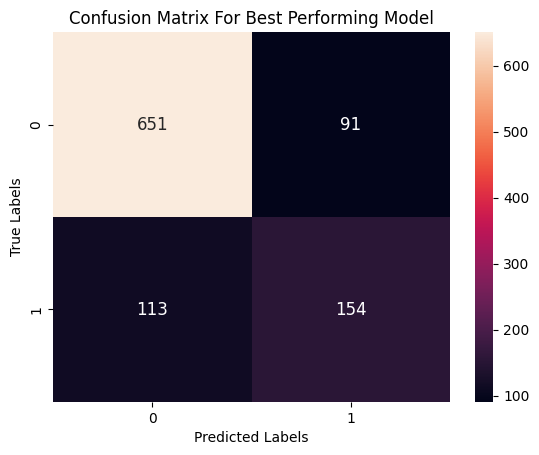

In [98]:
# Get the best performing model
best_model = metrics_table.sort_values(by="accuracy", ascending=False).iloc[0]

# Extract confusion matrix from the best model
conf_matrix = best_model['conf_matrix']

# Plot the confusion matrix using heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', annot_kws={"size": 12})

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix For Best Performing Model')

# Display the plot
plt.show()

Interpretation of Confusion Matrix
Positive class(Churn) = 1 Negative Class(Not Churn) = 0 TP = 153 FP = 97 FN = 97 TN = 662

TP: Represents a section of the customers that the ML algorithm predicted them to Churn(Positive) and they actually Churn.

FP: Represents a section of the customers where the ML model predicted them to Churn but they actually didn't churn.

FN: Represents the section of customers where the ML model predicted them Not to Churn but they actually churn.

TN: Section of the customers where the ML model predicted them Not to Churn and the actually didn't Churn.

#### Key Insights
- The balanced data performed poorly as compared to the unbalanced data
- The key metrics for the balanced dataset is accuracy since it is the best metric for balanced dataset
- From the metrics table, it could be deduced that CatBoostClassifier was the best perfoming model with an accuracy of 0.772052
- The top 3 models to be fine-tuned for better perfomance are CatBoostClassifier, RandomForestClassifier, LogisticRegression

In [ ]:
roc_data = {}

fig,ax = plt.subplots(figsize=(8,8))
# loop through all the models and pipeline 
for model_name,pipeline in all_pipelines.items():
    # get the predict probability from pipeline and store in a y_score variable 
    y_score = pipeline.predict_proba(X_val)[:, 1]
    #unpack roc_curve variables 
    fpr,tpr,threshold = roc_curve(y_val_encoded,y_score)
    roc_auc = auc(fpr,tpr)
    roc_auc_df = pd.DataFrame({"False Positive Rate":fpr,"True Positive Rate":tpr,"Threshold":threshold})
    roc_data[model_name] = roc_auc_df
    ax.plot(fpr,tpr,label={f'{model_name} (AUC-{roc_auc:.2f})'})
    ax.plot([0,1],[0,1])
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")

plt.legend()
plt.show()

### Business Impact Assesment
- The business focus is on the Negative Class, how our model is performing on predicting customers who churn.
- The AUC curve shown below shows a good performance of our models with AUC-values above 70% which shows a good sign to be in production.

## Model Evaluation
Based on the model performance from both the balanced and the unbalanced data, we decide to fine tune the following models for better performance
- CatBoostClassifier
- RandomForestClassifier
- Logistic Regression

In [ ]:
CatBoostClassifier?

Hyperparameter tuning using RandomizedSearchCV

In [ ]:
def hyperparameter_tuning(models,X_train,y_train,X_val,y_val):
    # Define parameter grid for the three models
    params_grid = {
    'catboost':{
        'learning_rate':np.linspace(0,0.3),
        'depth':randint(3,10),
        'l2_leaf_reg':randint(2,6),
        'rsm':uniform(0.5,1)
    },
    'random_forest':{
        'n_estimators':randint(10,100),
        'max_depth':randint(3,20),
        'min_samples_split':randint(2,20),
        'min_samples_leaf':randint(1,20)
    },
    'log_regression':{
        'C':uniform(0.1,10),
        'penalty':['l1','l2'],
        'solver':['liblinear','saga']
    }  
}
    # Initialize dictionary to store best params and best model
    best_model = {}
    best_params = {}

    # Perform hyper parameter tuning on each model 
    for model_name,model in models.items():
        # create RandomizedSearch object
        random_cv = RandomizedSearchCV(estimator=model,param_distributions=params_grid[model_name],cv=5,n_iter=100,random_state=42,n_jobs=-1)
        # Fit random_cv object on data
        random_cv.fit(X_train_preprocessed,y_train_encoded)

        # Get best params and best model
        best_params[model_name] = random_cv.best_params_
        best_model[model_name] = random_cv.best_estimator_

        # Evaluate the best model
        accuracy = best_model[model_name].score(X_val_preprocessed,y_val_encoded)
        print(f"accuracy of the best performing model {model_name} is:",accuracy)
        print("The best parameters are:")
        return best_params,best_model
    
    

In [ ]:
# Define parameter grid for the three models
params_grid = {
    'catboost': {
        'model__learning_rate': np.linspace(0, 0.3),
        'model__depth': randint(3, 10),
        'model__l2_leaf_reg': randint(2, 6),
        'model__rsm': uniform(0.5, 1)
    },
    'sgb_classifier': {
        'model__learning_rate': np.linspace(0, 0.3),
        'model__max_depth': randint(3, 10),
        'model__min_samples_split': randint(2, 20),
        'model__min_samples_leaf': randint(1, 20)
    },
    'log_regression': {
        'model__C': uniform(0.1, 10),
        'model__penalty': ['l1', 'l2'],
        'model__solver': ['liblinear', 'saga']
    }
}

# Initialize dictionary to store best params and best model
best_models = {}
best_params = {}

# Perform hyperparameter tuning on each model
for model_name, params in params_grid.items():
    # Create Pipeline object
    final_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', CatBoostClassifier() if model_name == 'catboost' else
         GradientBoostingClassifier() if model_name == 'sgb_classifier' else
         LogisticRegression())
    ])

    # Create RandomizedSearch object
    random_cv = RandomizedSearchCV(estimator=final_pipeline, param_distributions=params, cv=5, n_iter=100, random_state=42, n_jobs=-1)
    
    # Fit RandomizedSearch object on data
    random_cv.fit(X_train, y_train_encoded)

    # Get best params and best model
    best_params[model_name] = random_cv.best_params_
    best_models[model_name] = random_cv.best_estimator_

# Print best parameters for each model
for model_name, params in best_params.items():
    print(f"The best parameters for {model_name}: {params}")

In [ ]:
# Define Models to fine tune
models = {
    'catboost': CatBoostClassifier(),
    'random_forest': RandomForestClassifier(),
    'log_regression': LogisticRegression()}

# Calling the hyperparameter tuning function
hyperparameter_tuning(models,X_train_preprocessed,y_train_encoded,X_val_preprocessed,y_val_encoded)

### Making Predictions using Fine-Tuned Models

In [ ]:
# define table to hold all the metrics
tuned_metrics_table = pd.DataFrame(columns=['model_name', 'accuracy', 'precision', 'recall', 'f1_score', 'conf_matrix'])

tuned_metrics = {}
for model_name,model in best_model.items():
    # make predictions on the fine_tuned model
    y_tuned_predict = model.predict(X_val)

    # Generate classification report for each model
    tuned_metrics = classification_report(y_val_encoded,y_tuned_predict,output_dict=True)

    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_val_encoded, y_predict)

    # Grab all important metrics
    accuracy =tuned_metrics['accuracy']
    precision =tuned_metrics['weighted avg']['precision']
    recall =tuned_metrics['weighted avg']['recall']
    f1_score =tuned_metrics['weighted avg']['f1-score']

    # add important metrics to metrics_table
    tuned_metrics_table.loc[len(tuned_metrics_table)] = [model_name, accuracy, precision, recall, f1_score, conf_matrix]

# display metrics_table
tuned_metrics_table.sort_values(by="f1_score", ascending=False)

### Making Prediction on Test Data (Validation)

In [ ]:
test_data = pd.read_excel("../data/Telco-churn-last-2000.xlsx")

#### Preprocessing Test Data

In [ ]:
# Selecting Relevant Column To Be Used For Preprocessing
relevant_columns = ["Tenure","PaymentMethod", "MonthlyCharges","Contract","PaperlessBilling","Dependents"]
X_test = test_data[relevant_columns]
X_test.head()

In [ ]:
# set the best model 
best_estimator = best_models['catboost']
best_estimator

In [ ]:
# instantiating the fine-tuned catboost model
y_test_predicted = best_estimator.predict(X_test)
y_test_predicted

### Persist Model

In [ ]:
destination = os.path.join('.','model_export')

In [ ]:
with open('best_estimator.pkl','wb') as file:
    pickle.dump(best_estimator,file) 